In [1]:
# import libraries
from bmtk.analyzer.visualization.spikes import plot_spikes, plot_rates
import matplotlib.pyplot as plt
import matplotlib
from bmtk.analyzer import plot_potential, plot_calcium
import h5py
import numpy as np


# adjust the figure size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 11
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size    
matplotlib.rcParams.update({'font.size': 15})


In [2]:
%matplotlib notebook

# Raster plot

<IPython.core.display.Javascript object>


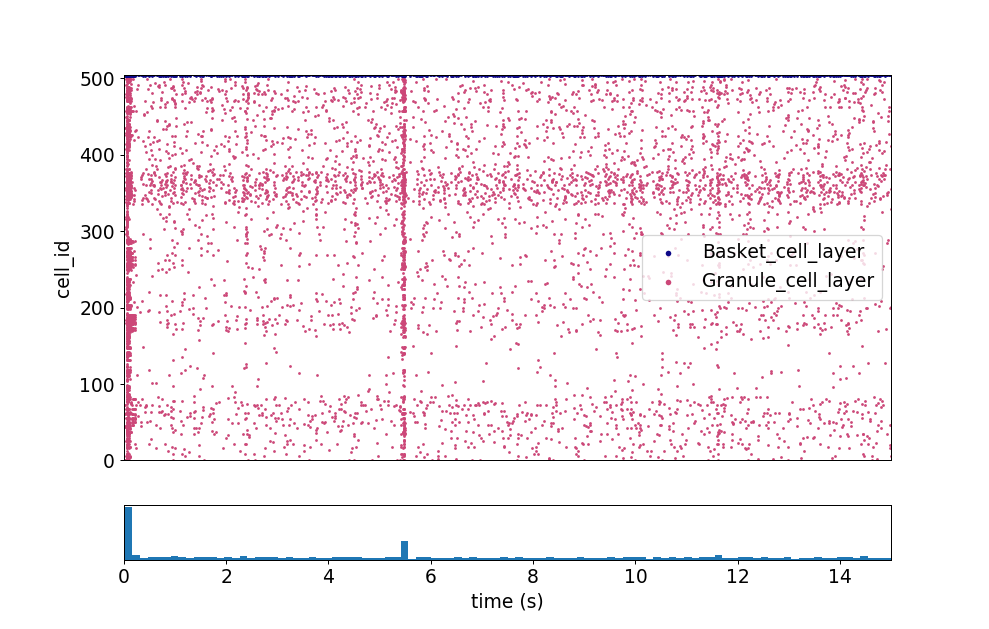

In [3]:
# raster

plot_spikes('network/DG_nodes.h5', 'network/DG_node_types.csv', 'output/spikes.h5', group_key='location', cmap='plasma')


# Rate plot

<IPython.core.display.Javascript object>


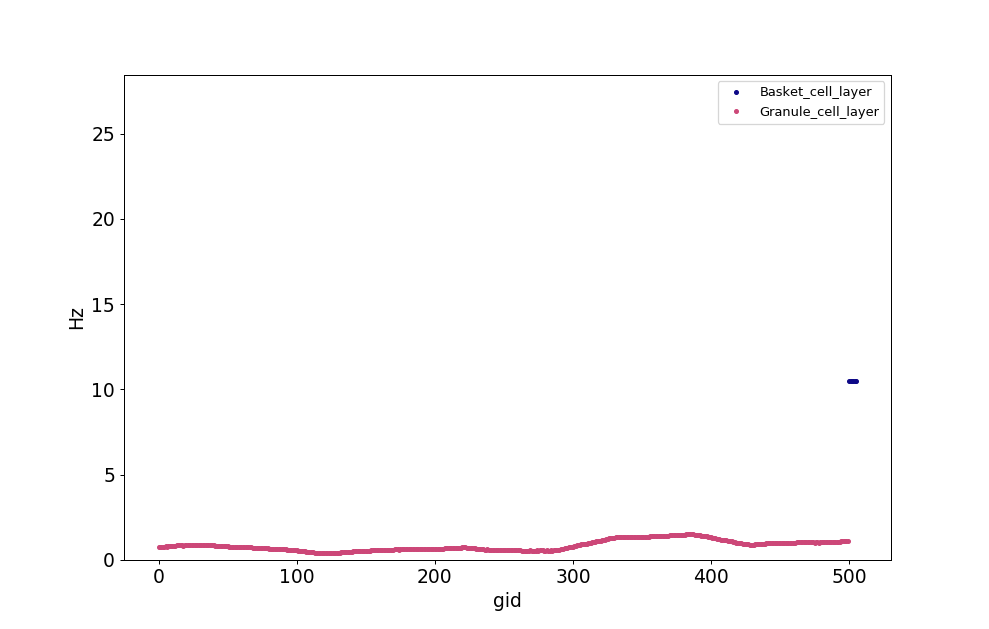

<IPython.core.display.Javascript object>


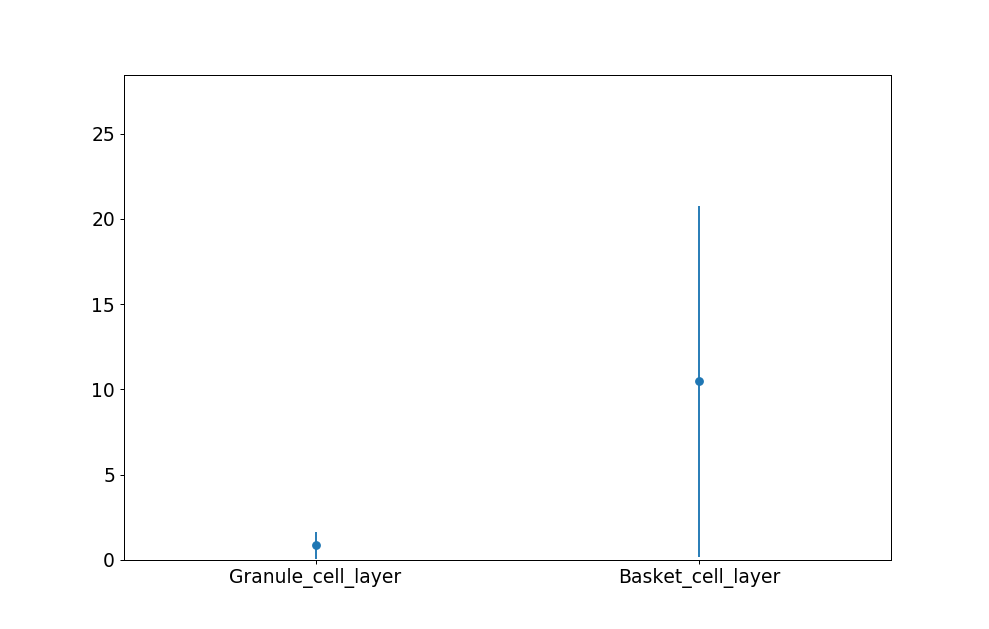

In [4]:
# rate plot

plot_rates('network/DG_nodes.h5', 'network/DG_node_types.csv', 'output/spikes.h5', group_key='location', smoothed=True, cmap='plasma')


# Plot potential of excitatory cells

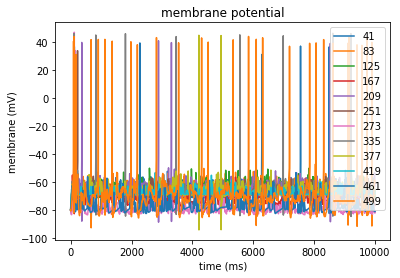

In [8]:
# rate plot

%matplotlib inline

plot_potential(cell_vars_h5='output/cell_vars.h5', gids=[41, 83, 125, 167, 209, 251, 273, 335, 377, 419, 461, 499])
#plot_potential(cell_vars_h5='output/cell_vars.h5', gids=[41, 83, 125, 167, 209])

# Plot potential of inhibitory cells

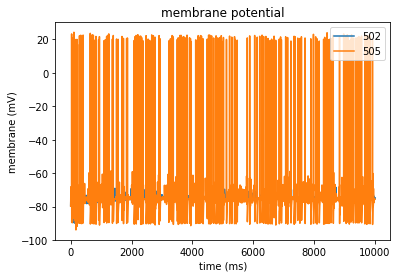

In [9]:
# dt=0.1 is explicitly set in the original code

plot_potential(cell_vars_h5='output/cell_vars.h5', gids=[502, 505])

# Extracellular potential computation

<HDF5 dataset "data": shape (100000, 7680), type "<f4">


<IPython.core.display.Javascript object>


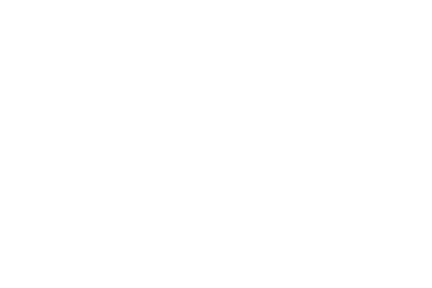

<IPython.core.display.Javascript object>


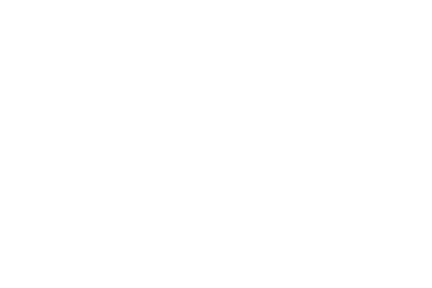

In [10]:
# load the extracellular potential

f = h5py.File('output/ecp.h5', 'r')

print f['data']

A=np.array(f['data'])

potential=np.zeros(len(A[:]))


# load the data for the first electrode
for i in range(len(A[:])):
    potential[i]=A[i][0]
    
# plot the extracellular potential

%matplotlib notebook

time=np.array(range(len(potential)))/10


plt.plot(potential*1000*1000)
plt.xlim(42500, 45000)
plt.ylabel('extracellular potential (uV)')
plt.savefig('extra_cells.eps', format='eps', dpi=300)

<IPython.core.display.Javascript object>


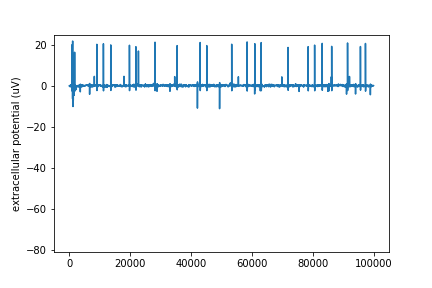

In [11]:
%matplotlib notebook

plt.plot(potential*1000*1000)

#plt.xlim(57500, 60000)
plt.ylim(-81,25)

plt.ylabel('extracellular potential (uV)')
plt.savefig('extra_cells.eps', format='eps', dpi=300)